In [84]:
%load_ext autoreload
%autoreload 2
from variogram import *
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\Code\Geostatistics\variogram.py:235: SyntaxWarning: invalid escape sequence '\g'
  fig.colorbar(c, ax=ax, label="Mean $\gamma(d)$")


In [85]:
# The first step is to load the CSV file. In this example, this is done with the 'Pandas' package. 
# You can do that by using the function `pd.read_csv()`.

data = pd.read_csv('input_data.csv')
target = pd.read_csv('interpolation_grid.csv')

# The input dataset is of size 500
# The target grid consists of 146 x 140 longitude/latitude locations (flattened arrays)

# Show list of data variables in dataset
print(list(data))

var_name = "CH4"

data_vals = data[var_name].values # extract the O3 values and convert them to a numpy array
lon_data = data["Lon"].values # longitude coordinates of data points, as numpy array
lat_data = data["Lat"].values # latitude coordinates of data points, as numpy array

lon_target = target["Var1"].values # longitude coordinates of target points, as numpy array
lat_target = target["Var2"].values # latitude coordinates of target points, as numpy array

['Lat', 'Lon', 'CO', 'O3', 'NOx', 'CPC', 'Ace', 'Iso', 'CH4', 'Tmp', 'IOP']


In [86]:
variogram = Variogram()
variogram.calculate(lat_data, lon_data, data_vals, distance_function='latlon')

<Axes: title={'center': 'Variogram'}, xlabel='Distance', ylabel='$S_{ij} / 2$'>

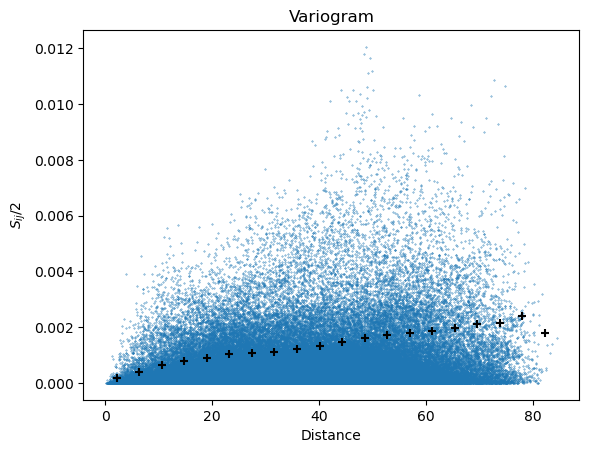

In [89]:
variogram.plot_isotropic(bins=20, cloud=True)

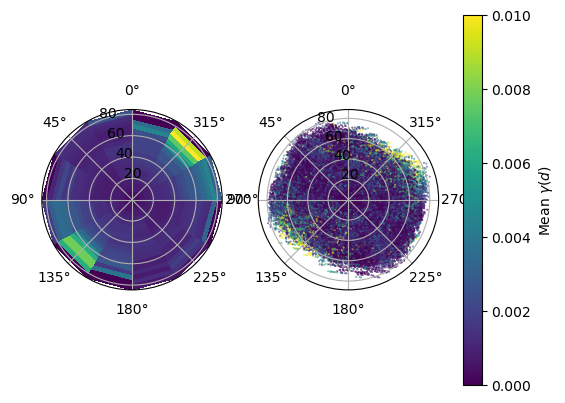

In [90]:
variogram.plot_anisotropic(bins_radius=20, bins_heading=12, cloud=True)

<Axes: xlabel='Distance', ylabel='$S_{ij} / 2$'>

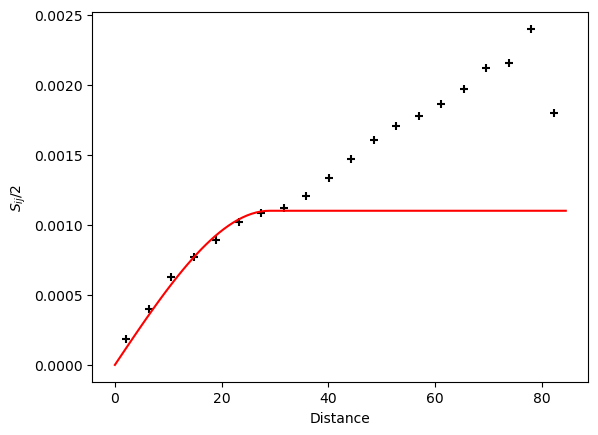

In [107]:
variogram.add_model('spherical', range=29, sill=0.0011, nugget=0)
variogram.plot_isotropic(bins=20, cloud=False)

<Axes: xlabel='Distance', ylabel='$S_{ij} / 2$'>

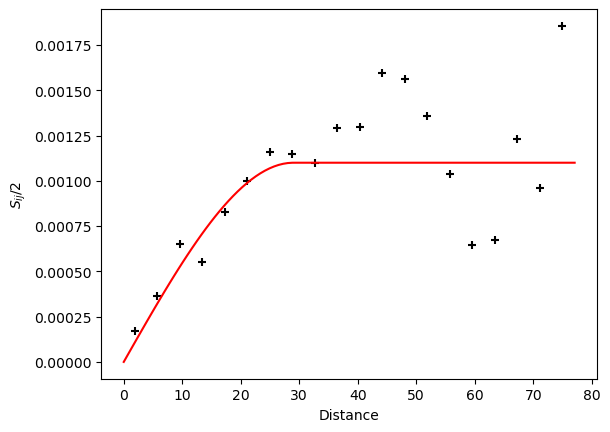

In [138]:
variogram.plot_directional(0, tol=15, bins=20, cloud=False)